In [8]:
import json

record = {
    "timestamp": "2022.07.04_15.09.30",
    "antenna_pattern": 22056,
    "slot_duration": "1us",
    "status": "CRC OK",
    "RSSI": -560,
    "IQ": [(-17,-5),(16,3),(-17,-4),(16,4),(-17,-5),(16,4),(-17,-5),(15,5),(15,5),(11,-1),(18,-1),(14,8),(15,5),(10,-1),(18,3),(13,10),(14,8),(11,2)]
}

dataset = {
    "header": {
            "time_start": "2022.07.04_15:09:30",
            "adv_interval": "300ms",
            "antenna_pattern": 22056,
            "slot_duration": "1us",
        },
    "records": [{
        "timestamp": "+0:00:00.509326",
        "RSSI": -560,
        "IQ": [(-17,-5),(16,3),(-17,-4),(16,4),(-17,-5),(16,4),(-17,-5),(15,5),(15,5),(11,-1),(18,-1),(14,8),(15,5),(10,-1),(18,3),(13,10),(14,8),(11,2)]
    },{
        "timestamp": "+0:00:01.211863",
        "RSSI": -560,
        "IQ": [(-17,-5),(16,3),(-17,-4),(16,4),(-17,-5),(16,4),(-17,-5),(15,5),(15,5),(11,-1),(18,-1),(14,8),(15,5),(10,-1),(18,3),(13,10),(14,8),(11,2)]
    }]
}

json_data = json.dumps(dataset)
print(json_data)


print(f"Whole array: {record.get('IQ')}")
print(f"One tuple: {record.get('IQ')[3]}")
print(f"One tuple In-phase: {record.get('IQ')[3][0]}")
print(f"One tuple Quadrature: {record.get('IQ')[3][1]}")

{"header": {"adv_interval": "300ms", "antenna_pattern": 22056, "slot_duration": "1us"}, "records": [{"timestamp": "2022.07.04_15.09.30", "RSSI": -560, "IQ": [[-17, -5], [16, 3], [-17, -4], [16, 4], [-17, -5], [16, 4], [-17, -5], [15, 5], [15, 5], [11, -1], [18, -1], [14, 8], [15, 5], [10, -1], [18, 3], [13, 10], [14, 8], [11, 2]]}, {"timestamp": "2022.07.04_15.09.30", "RSSI": -560, "IQ": [[-17, -5], [16, 3], [-17, -4], [16, 4], [-17, -5], [16, 4], [-17, -5], [15, 5], [15, 5], [11, -1], [18, -1], [14, 8], [15, 5], [10, -1], [18, 3], [13, 10], [14, 8], [11, 2]]}]}
Whole array: [(-17, -5), (16, 3), (-17, -4), (16, 4), (-17, -5), (16, 4), (-17, -5), (15, 5), (15, 5), (11, -1), (18, -1), (14, 8), (15, 5), (10, -1), (18, 3), (13, 10), (14, 8), (11, 2)]
One tuple: (16, 4)
One tuple In-phase: 16
One tuple Quadrature: 4


In [39]:
import datetime
from time import sleep

class UART_Logger:
    def __init__(self):
        self.start_time = None

    def timestamp(self):
        self.start_time = datetime.datetime.now()
        return self.start_time.strftime("%Y.%m.%d_%H:%M:%S")

    def timestamp_diff(self):
        now = datetime.datetime.now()
        diff = now - self.start_time
        return f"+{diff}"

Logger = UART_Logger()
print(Logger.timestamp())
sleep(0.002)
print(Logger.timestamp_diff())
sleep(0.002)
print(Logger.timestamp_diff())
sleep(0.002)
print(Logger.timestamp_diff())


2022.07.22_15:51:51
+0:00:00.006628
+0:00:00.022008
+0:00:00.037811


In [24]:
line = '$Addr:3A:27:5F:80:06:AF (random),interval:300ms,PHY:LE 2M'
print(line[:5])
print(line[1:].split(','))
print([sub.split(':', 1) for sub in (line[1:].split(','))])



$Addr
['Addr:3A:27:5F:80:06:AF (random)', 'interval:300ms', 'PHY:LE 2M']
[['Addr', '3A:27:5F:80:06:AF (random)'], ['interval', '300ms'], ['PHY', 'LE 2M']]


In [28]:
header = {
    "Timestart" : None,
    "Addr" : None,
    "Interval" : None,
    "PHY" : None,
    "Pattern" : None,
    "Samples" : None,
    "Slot" : None
}

line = '$Addr:3A:27:5F:80:06:AF (random),Interval:300ms,PHY:LE 2M'
tokens = [sub.split(':', 1) for sub in (line[1:].split(','))]
header["Timestart"] = Logger.timestamp()
for i in range(len(tokens)):
    header[tokens[i][0]] = tokens[i][1]
state = "packet_info"

print(header)

{'Timestart': '2022.07.22_14:21:36', 'Addr': '3A:27:5F:80:06:AF (random)', 'Interval': '300ms', 'PHY': 'LE 2M', 'Pattern': None, 'Samples': None, 'Slot': None}


In [10]:
line = '$Pattern:22056,Channel:14,Samples:18,Slot:1us,RSSI:-480,IQ:[[-4,1],[3,-2],[-5,1],[4,-2],[-5,1],[4,-2],[-5,1],[4,-2],[3,-2],[10,-3],[6,9],[4,-1],[3,-1],[10,-1],[6,9],[4,0],[3,-1],[10,3]]'
IQ_data = line[1:-1].split('[', 1)
print(IQ_data)

tokens = [sub.split(':', 1) for sub in (IQ_data[0].split(','))]
print(tokens)

sample = {
    "Timediff" : None,
    "RSSI" : None,
    "IQ" : None
}

for i in range(len(tokens)):
    token = tokens[i][0]
    if token in sample:
        if token == "IQ":
            sample[tokens[i][0]] = IQ_data[1]
        else:
            sample[tokens[i][0]] = tokens[i][1]

print(sample)

['Pattern:22056,Channel:14,Samples:18,Slot:1us,RSSI:-480,IQ:', '[-4,1],[3,-2],[-5,1],[4,-2],[-5,1],[4,-2],[-5,1],[4,-2],[3,-2],[10,-3],[6,9],[4,-1],[3,-1],[10,-1],[6,9],[4,0],[3,-1],[10,3]']
[['Pattern', '22056'], ['Channel', '14'], ['Samples', '18'], ['Slot', '1us'], ['RSSI', '-480'], ['IQ', '']]
{'Timediff': None, 'RSSI': '-480', 'IQ': '[-4,1],[3,-2],[-5,1],[4,-2],[-5,1],[4,-2],[-5,1],[4,-2],[3,-2],[10,-3],[6,9],[4,-1],[3,-1],[10,-1],[6,9],[4,0],[3,-1],[10,3]'}


In [69]:
import datetime
import time
import sys
import serial
import json
import threading

class UART_Logger:
    def __init__(self, port='COM4', baudrate='115200'):
        self.port = port
        self.baudrate = baudrate
        self.serial = None
        self.conn = None
        self.start_time = None

    def connect(self):
        try:
            self.serial = serial.Serial()
            self.serial.baudrate = self.baudrate
            self.serial.port = self.port
            self.serial.timeout = 1
            self.serial.open()
        except (OSError, serial.SerialException):
            print(f"Problem: {serial.SerialException}")
            pass

    def disconnect(self):
        if(self.serial and not self.serial.is_open):
            self.serial.close()

    def _trigger(self, event):
        while not event.isSet():
            line = self.conn.readline()
            if(line == 'Init device tracking'):
                break
    
    # Signal when start header found in stream
    def trigger(self, timeout) -> bool:
        isSuccess = True
        event = threading.Event()
        worker = threading.Thread(target=self._trigger, args=(event,))
        worker.start()
        worker.join(timeout)
        if(worker.is_alive()):
            event.set()
            isSuccess = False
        worker.join()
        return isSuccess

    # Read line from stream without '\n'
    def readline(self):
        print(self.serial.read_until(b'\r\n').decode("utf-8"))

Logger = UART_Logger()
Logger.connect()
Logger.readline()
Logger.disconnect()

$Pattern:22056,Channel:28,Samples:18,Slot:1us,RSSI:-620,IQ:[[-27,-17],[26,16],[-28,-16],[26,16],[-25,-19],[25,19],[-26,-18],[22,20],[27,16],[9,-3],[-2,15],[17,25],[22,21],[9,0],[-4,14],[11,28],[14,27],[8,3]]



In [36]:
import json

new = {'Pattern': 22056, 'Channel': 24, 'Samples': 18, 'Slot': '1us', 'RSSI': -490, 'IQ': [[1, -7], [-2, 6], [1, -7], [-2, 6], [1, -7], [-2, 6], [2, -7], [-3, 6], [-2, 6], [2, 9], [-6, 9], [-3, 6], [-3, 6], [1, 9], [-7, 8], [-4, 5], [-3, 5], [-1, 10]]}

keys_list = list(new)
key = keys_list[1]
print(key)

# print(json.loads(new))

# dump = json.dumps(py_dict)
# print(dump)


Channel


In [7]:
import pathlib

pathlib.Path("logs").mkdir(exist_ok=True)
print(pathlib.Path().absolute())


c:\Users\Trait\Repos\BLE_DirectionFinding\AoA_Localization_Engine


In [4]:
from parse import parse

line = "IQ:5,40,11,-129,-132"
parsed_data = parse('{}:{}', line)
print(parsed_data)
print(parsed_data[0])
print(parsed_data[1])


<Result ('IQ', '5,40,11,-129,-132') {}>
IQ
5,40,11,-129,-132


In [8]:
import math
import cmath

data90 = {
    "Timediff": "+0:00:01.514029",
    "RSSI": -480,
    "IQ": [
      [10, -8],
      [-12, 6],
      [11, -7],
      [-12, 6],
      [11, -7],
      [-12, 6],
      [11, -7],
      [-12, 6],
      [-12, 6],
      [-9, 6],
      [-8, 6],
      [-13, 3],
      [-12, 5],
      [-9, 5],
      [-9, 5],
      [-14, 1],
      [-12, 5],
      [-11, 2]
    ]}

data45 = {
    "Timediff": "+0:00:01.511192",
    "RSSI": -440,
    "IQ": [
      [-1, -13],
      [-1, 12],
      [1, -13],
      [-2, 13],
      [1, -13],
      [-1, 13],
      [1, -13],
      [-2, 12],
      [1, 12],
      [-7, -8],
      [-7, 6],
      [-3, 12],
      [1, 12],
      [-6, -9],
      [-7, 4],
      [-6, 11],
      [-1, 12],
      [-2, -10]
    ]}

data135 = {
    "Timediff": "+0:00:05.713562",
    "RSSI": -570,
    "IQ": [
      [9, 9],
      [-11, -9],
      [11, 7],
      [-11, -8],
      [9, 8],
      [-10, -10],
      [8, 10],
      [-9, -11],
      [-12, -9],
      [8, 8],
      [-16, 9],
      [-7, -13],
      [-11, -10],
      [7, 10],
      [-17, 7],
      [-5, -13],
      [-9, -11],
      [3, 12]
    ]}

IQ = []
for elem in data45["IQ"]:
    I = elem[0]/128 if elem[0] < 0 else elem[0]/127
    Q = elem[1]/128 if elem[1] < 0 else elem[1]/127
    IQ.append(complex(I,Q))

print(IQ)

Amplitude = []
Phase = []
for elem in IQ:
    Amplitude.append(math.sqrt(elem.real**2+elem.imag**2))
    Phase.append(math.atan2(elem.imag,elem.real))

print(Amplitude)
print(Phase)

print(f"IQ: {IQ[9]}, Amplitude: {Amplitude[9]}, Phase: {Phase[9]}")
p_diff = []
p = []

for i in range(0,17):
  p.append(Phase[i]*(180/math.pi))
  p_diff.append((Phase[i]-Phase[i+1])*(180/math.pi))

print(f"Ref phases 0:{p[0]}, 1:{p[1]}, 2:{p[2]}, 3:{p[3]}, 4:{p[4]}, 5:{p[5]}, 6:{p[6]}, 7:{p[7]}")
print(f"Ref diffs: {p_diff[0]}, {p_diff[1]}, {p_diff[2]}, {p_diff[3]}, {p_diff[4]}, {p_diff[5]}, {p_diff[6]}, {p_diff[7]}")
print(f"Phase diffs: (11,12) = {(Phase[8]-Phase[9])*(180/math.pi)}, (12,1) = {(Phase[9]-Phase[10])*(180/math.pi)}, (1,2) = {(Phase[10]-Phase[11])*(180/math.pi)}")

vel_air = 299702547 #m/s
freq = 2460000000 #Hz
d = 0.05
wave_len = vel_air/freq
print(f"calc: {wave_len}")
p_diff = Phase[8]-Phase[9]
# AoA = math.acos((p_diff*wave_len)/(2*math.pi*d))
AoA = []

pattern_len = 4
start = 8

for i in range(start,16):
    if((i + 1 - start) % pattern_len != 0):
        p_diff = Phase[i]-Phase[i+1]
        AoA.append(math.acos((p_diff*wave_len)/(2*math.pi*d))*(180/math.pi))

print(f"AoA: {AoA}")
mean = 0
for i in AoA:
  mean += i
mean /= len(AoA)
print(f"Mean: {mean}\n")
# print(f"AoA mean: {(AoA[0]+AoA[2])/2}")
# print(f"AoA mean: {(AoA[0]+AoA[2]+AoA[3]+AoA[5])/4}")
# Amplitude = math.
# Phase_Diff = 

# def norm_IQ_from_8bit(IQ_8bit):
#     IQ = [0,0]
    
#     IQ_8bit[0] < 0 ? IQ[0] = 8bit_IQ[0]/128 : IQ[0] = 8bit_IQ[0]/127

#     if(8bit_IQ[0] < 0):
        

# Higher than 0: value/127 = something 
# Lower than 0: value/128 = -something


# 90 degrees log_2022.08.06_09.58.31
# 45 degrees log_2022.08.06_09.58.46



# IQ:0,0,11,75,151
# IQ:1,8,11,148,-72
# IQ:2,16,11,-82,-149
# IQ:3,24,11,-140,86
# IQ:4,32,11,100,132
# IQ:5,40,11,132,-111
# IQ:6,48,11,-108,-127
# IQ:7,56,11,-108,120

data1 = {"IQ" : [
      [75,151],
      [148,-72],
      [-82,-149],
      [-140,86],
      [100,132],
      [132,-111],
      [-108,-127],
      [-108,120]
    ]}

IQ1 = []
for elem in data1["IQ"]:
    I = elem[0]/2048 if elem[0] < 0 else elem[0]/2047
    Q = elem[1]/2048 if elem[1] < 0 else elem[1]/2047
    IQ1.append(complex(I,Q))

print(IQ1)

p_diff1 = []
p1 = []

for i in range(0,8):
  p1.append(Phase[i]*(180/math.pi))
  p_diff1.append((Phase[i]-Phase[i+1])*(180/math.pi))

print(p_diff1)
print(p1)



[(-0.0078125-0.1015625j), (-0.0078125+0.09448818897637795j), (0.007874015748031496-0.1015625j), (-0.015625+0.10236220472440945j), (0.007874015748031496-0.1015625j), (-0.0078125+0.10236220472440945j), (0.007874015748031496-0.1015625j), (-0.015625+0.09448818897637795j), (0.007874015748031496+0.09448818897637795j), (-0.0546875-0.0625j), (-0.0546875+0.047244094488188976j), (-0.0234375+0.09448818897637795j), (0.007874015748031496+0.09448818897637795j), (-0.046875-0.0703125j), (-0.0546875+0.031496062992125984j), (-0.046875+0.08661417322834646j), (-0.0078125+0.09448818897637795j), (-0.015625-0.078125j)]
[0.10186253758129139, 0.09481061655893665, 0.10186727408864069, 0.10354787096334676, 0.10186727408864069, 0.10265990508612363, 0.10186727408864069, 0.09577138654648219, 0.09481570534482121, 0.08304801416198945, 0.07226843792596412, 0.09735160123123662, 0.09481570534482121, 0.08450510801868726, 0.06310883171358798, 0.09848492589746924, 0.09481061655893665, 0.07967217989988726]
[-1.6475682180646

ValueError: math domain error

In [6]:
import math
import cmath
import json
import numpy as np

### Methods

def ref_mean(ref_samp):
  diff = []
  for i in range(len(ref_samp)-1):
    diff.append(abs(ref_samp[i]-ref_samp[i+1]))
  return sum(diff)/len(diff)

def mean_calc(ref_samp):
  diff = []
  for i in range(len(ref_samp)-1):
    diff.append(abs(ref_samp[i]-ref_samp[i+1]))
  return sum(diff)/len(diff)

def plus_minus_pi(phase):
  while (phase > math.pi):
    phase -= 2*math.pi
  while (phase < -math.pi):
    phase += 2*math.pi
  return phase
  
def calc_azimuth(diff):
  val = (diff*wave_len)/(2*math.pi*d)
  return math.acos(val) # diff*0.387701 < 1 && diff*0.387701 > -1

### Load data from file
data = None
with open('../logs/outdoor/2022.08.15/log_2022.08.15_15.27.44.json') as f:
   data = json.load(f)

all_azimuth = []
Corner_refs = []
# for index in range(len(data["Records"])):

IQ = []
for elem in data["Records"][0]["IQ"]:
# for elem in data["Records"][index]["IQ"]:
    I = elem[0]/128 if elem[0] < 0 else elem[0]/127
    Q = elem[1]/128 if elem[1] < 0 else elem[1]/127
    IQ.append(complex(I,Q))

# Calculate phases from IQ samples
Phase_rad = []
Phase_deg = []

for elem in IQ:
  # Must use atan2 to receive valid results
  rad = np.arctan2(elem.imag,elem.real)  #TODO: Should be atan2(-Q,I) or atan2(Q,I)?
  Phase_rad.append(rad) 
  Phase_deg.append(np.rad2deg(rad))

# Separate samples from reference period and sampling period
# Reference_rad = Phase_rad[:8]
# Samples_rad = Phase_rad[8:]
# print(Reference_rad)

Reference_deg = Phase_deg[:8]
print(Reference_deg)
Samples_deg = Phase_deg[8:]


# ref_mean = mean_calc(Reference_rad)
# print(f"Mean reference {ref_mean*(180/math.pi)}")

vel_air = 299702547 #m/s
freq = 2460000000 #Hz
# wave_len = vel_air/freq
wave_len = 0.12
d = 0.05

# print(f"Rad samp 1: {Samp_rad[0]}, samp 2: {samp_calc}")
# print(f"Deg samp 1: {Samp_rad[0]*(180/math.pi)}, samp 2: {samp_calc*(180/math.pi)}")
# print(f"Rad diff: {diff} -PI+PI: {plus_minus_pi(diff)}")
# print(f"Deg diff: {diff*(180/math.pi)} -PI+PI: {plus_minus_pi(diff)*(180/math.pi)}")

# Azimuth_deg = []
# for i in range(len(Samp_rad)-1):
#   samp_calc = Samp_rad[i+1]-2*ref_mean
#   diff = Samp_rad[i]-samp_calc

#   if ((i+1)%4 == 0):
#     Corner_refs.append(diff)

# print(Corner_refs)
# print(f"Corner ref {sum(Corner_refs)/len(Corner_refs)*(180/math.pi)}")
# print(f"2 Ref mean: {2*ref_mean*(180/math.pi)}")


  # else:
  #   try:
  #     # print(f"diff of {i} minus {i+1}. Diff:{plus_minus_pi(diff)*(180/math.pi)}, Azim:{calc_azimuth(plus_minus_pi(diff))*(180/math.pi)}")
  #     print(f"diff of {i} minus {i+1}. Azim:{calc_azimuth(plus_minus_pi(diff))*(180/math.pi)}")
  #   except (ValueError):
  #     print(f"{i}. Invalid value: {(plus_minus_pi(diff))*(180/math.pi)}")
  # Azimuth_deg.append(calc_azimuth(plus_minus_pi(diff))*(180/math.pi))

  # print(f"Sample index: {index}")
  # print(Azimuth_deg)
  # print(sum(Azimuth_deg)/len(Azimuth_deg))
  # all_azimuth.append(sum(Azimuth_deg)/len(Azimuth_deg))
# print(sum(all_azimuth)/len(all_azimuth))

[-1.068145486976018, 2.1778425517079385, -1.068145486976018, 2.228042274429078, -1.026910235372549, 2.352272941667585, -0.9563807312463889, 2.293545953575113]
[-61.20022830967188, 124.78118665686664, -61.20022830967188, 127.65741890151492, -58.837622425633036, 134.7753118203755, -54.79657950805354, 131.41050325916183]


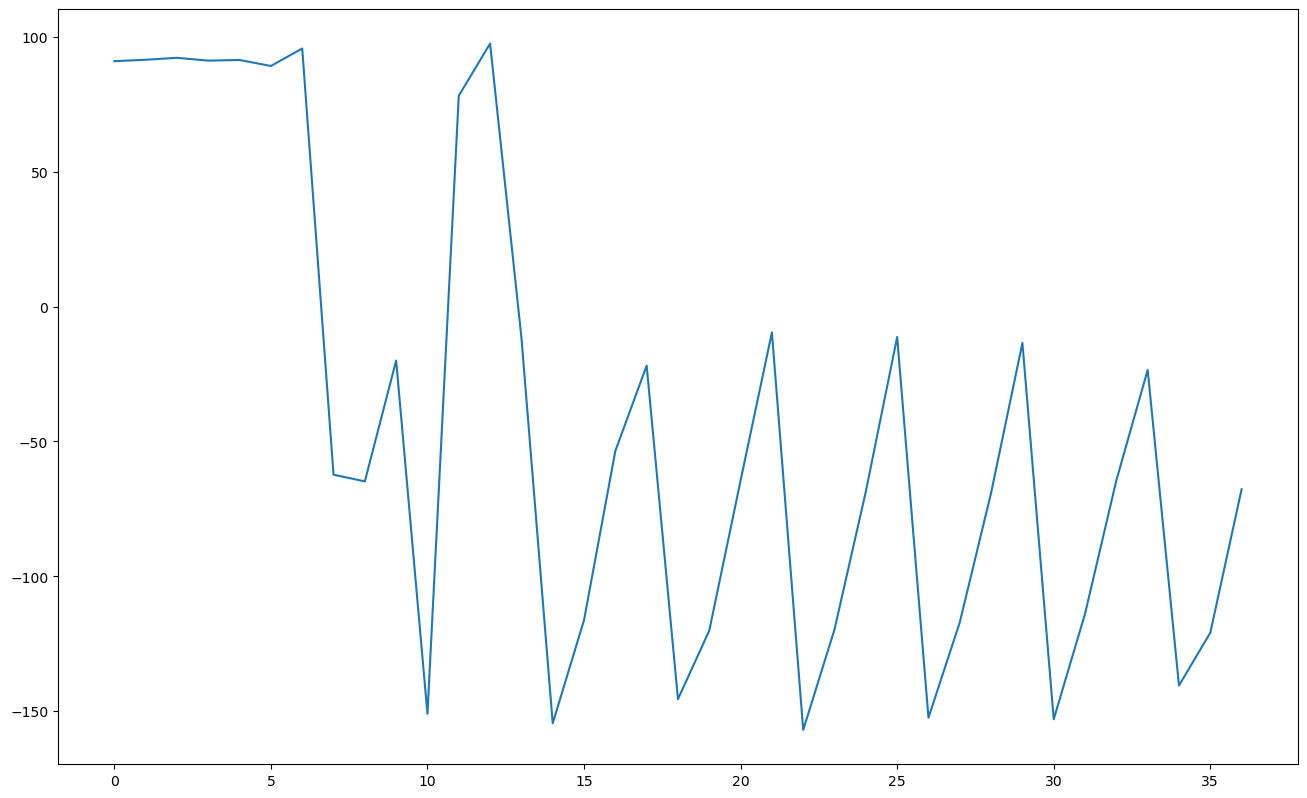

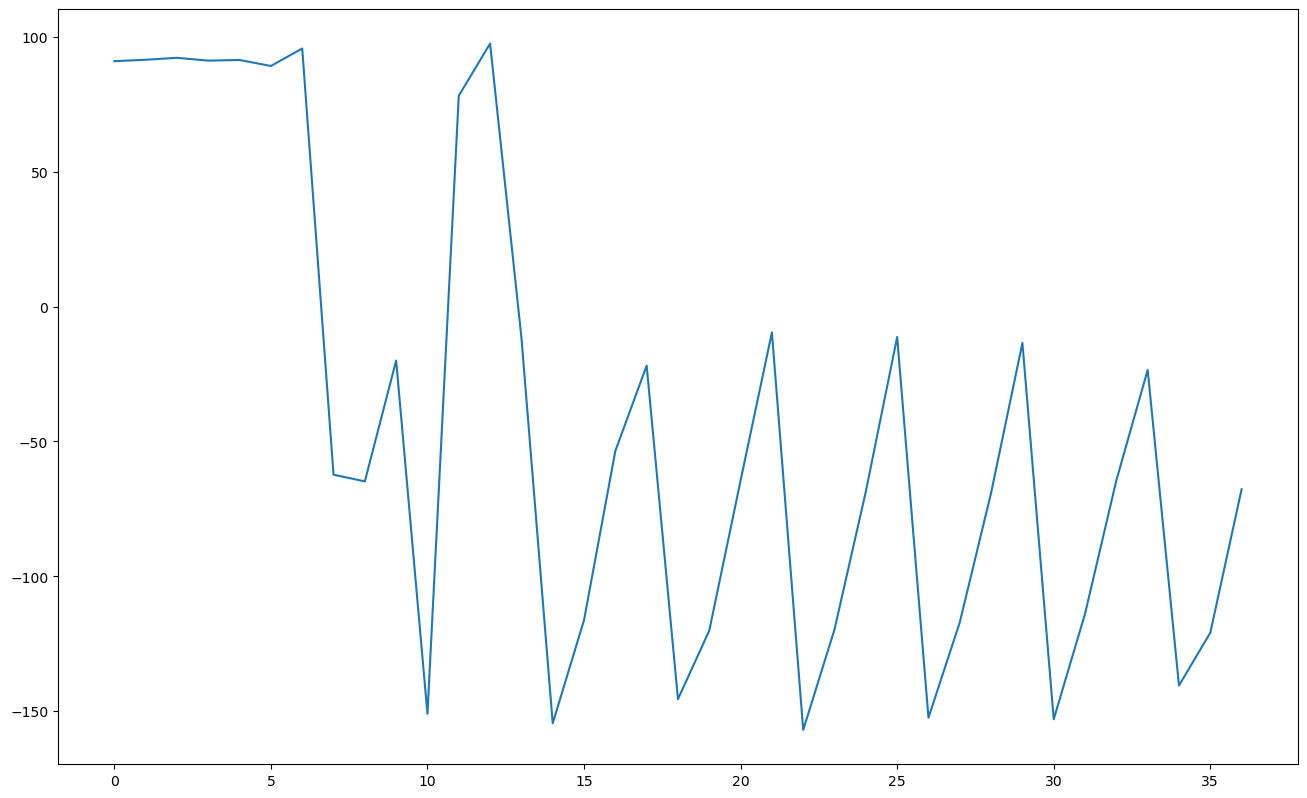

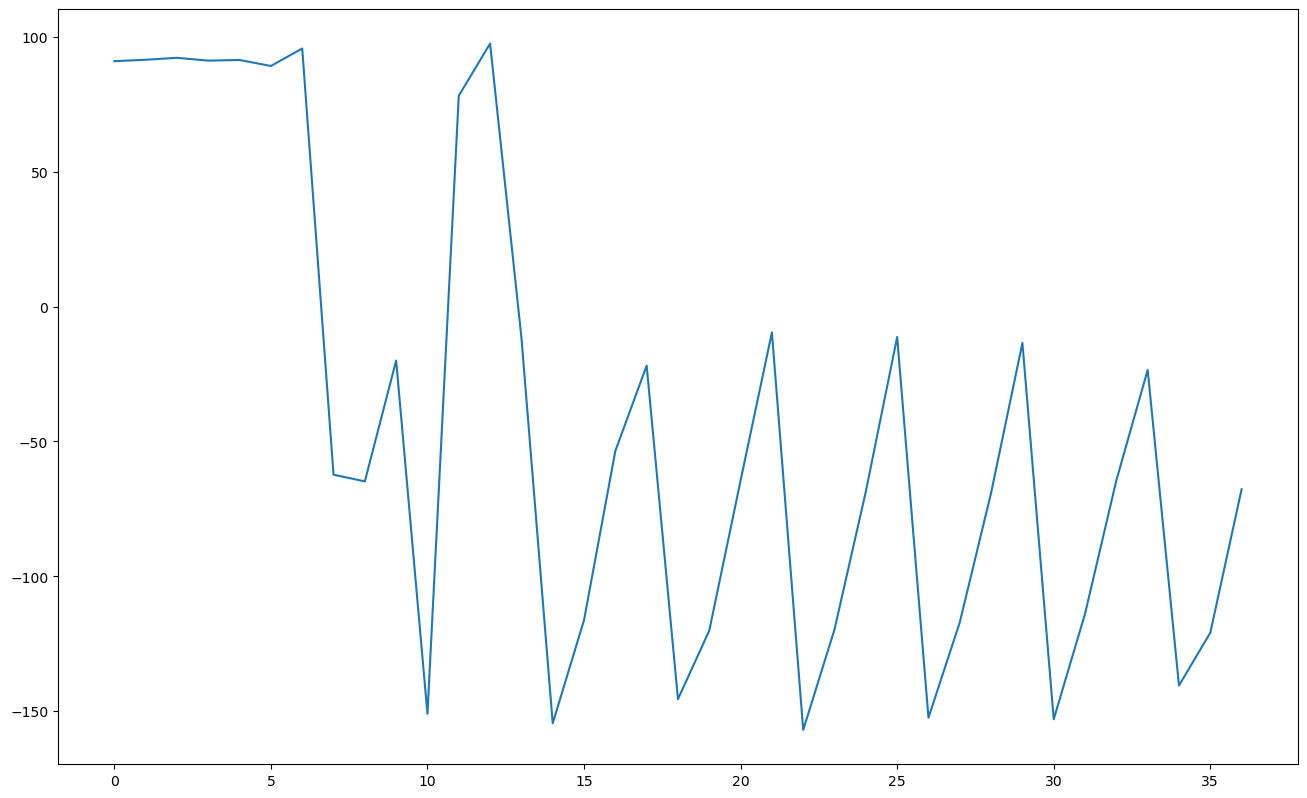

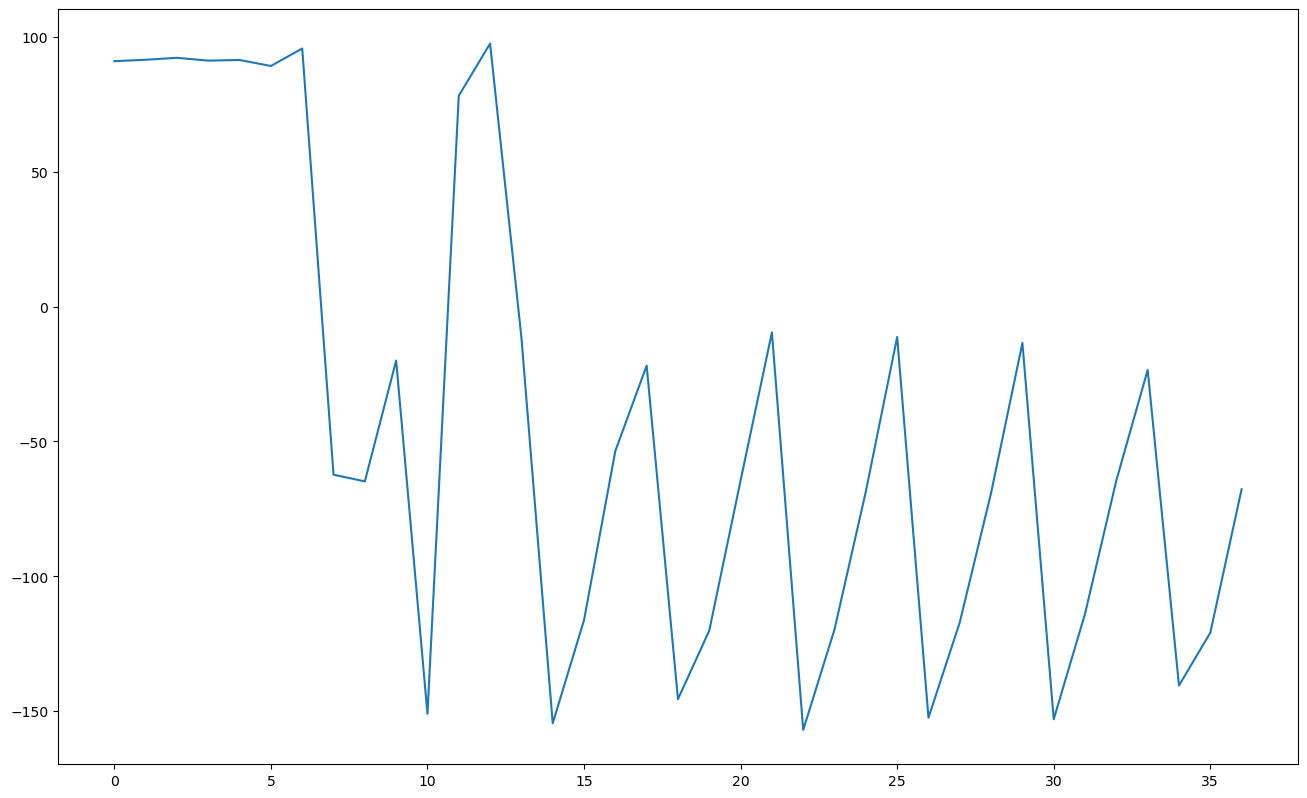

In [35]:
import math
import cmath
import json
import numpy as np
import matplotlib.pyplot as plt



### Methods
def to_plus_minus_pi(angle):
    while angle >= 180:
        angle -= 2 * 180
    while angle < -180:
        angle += 2 * 180
    return angle

### Load data from file
data = []
with open('../logs/outdoor/2022.08.15/log_2022.08.15_15.27.44.json') as f: #distance 4m, 0 deg, in front of antenna
   data.append(json.load(f))

with open('../logs/outdoor/2022.08.15/log_2022.08.15_15.30.38.json') as f: #distance 4m, 45 deg, on the right of antenna
   data.append(json.load(f))

with open('../logs/outdoor/2022.08.15/log_2022.08.15_15.33.47.json') as f: #distance 4m, 15-30 deg, on the right of antenna
   data.append(json.load(f))

with open('../logs/outdoor/2022.08.15/log_2022.08.15_15.41.38.json') as f: #distance 4m, -45 deg, on the left of antenna
   data.append(json.load(f))

all_azimuth = []
Corner_refs = []
# for index in range(len(data["Records"])):

for i in range(4):
    # IQ = []
    # for elem in data[i]["Records"][0]["IQ"]:
    # # for elem in data["Records"][index]["IQ"]:
    #     I = elem[0]/128 if elem[0] < 0 else elem[0]/127
    #     Q = elem[1]/128 if elem[1] < 0 else elem[1]/127
    #     IQ.append(complex(I,Q)) 

    # Reference_deg = Phase_deg[:8]
    # print(Reference_deg)
    # Samples_deg = Phase_deg[8:]

    # IQ_Reference = IQ[:8]
    # IQ_Samples = IQ[8:]

    data = {
    "IQ": [
        [-96,134],
        [-133,-99],
        [104,-132],
        [124,106],
        [-109,122],
        [-119,-112],
        [111,-121],
        [107,120],
        [136,-34],
        [15,-76],
        [-30,-193],
        [-80,218],
        [-129,-19],
        [22,-77],
        [16,-202],
        [-115,199],
        [121,8],
        [50,-59],
        [64,-192],
        [-181,137],
        [112,47],
        [55,-49],
        [122,-152],
        [-203,109],
        [102,64],
        [61,-45],
        [133,-146],
        [-224,82],
        [96,89],
        [69,-34],
        [153,-127],
        [-222,50],
        [72,97],
        [77,-15],
        [166,-114],
        [-239,-21],
        [52,107],
        [79,-5]
    ]}

    Phases = []
    PhasesDiff = []
    for i in range(len(data['IQ'])-1):
        # iq_next = IQ[i + 1]
        # iq_current = IQ[i]
        iq_next = complex(data['IQ'][i + 1][0], data['IQ'][i + 1][1])
        iq_current = complex(data['IQ'][i][0], data['IQ'][i][1])
        phase_next = np.rad2deg(np.arctan2(iq_next.imag, iq_next.real))
        phase_current = np.rad2deg(np.arctan2(iq_current.imag, iq_current.real))
        Phases.append(phase_current)
        PhasesDiff.append((to_plus_minus_pi(phase_next - phase_current)))

    plt.figure(figsize=(16, 10), dpi=100)
    # plt.plot(Phases)
    plt.plot(PhasesDiff)
    plt.show()

    # print(IQ)
    # Diff_samples = []
    # for i in range(len(IQ_Samples)-1):
    #     iq_next = IQ[i + 1]
    #     print(iq_next)
    #     iq_current = IQ[i]
    #     print(iq_current)
    #     phase_next = np.rad2deg(np.arctan2(iq_next.imag, iq_next.real))
    #     phase_current = np.rad2deg(np.arctan2(iq_current.imag, iq_current.real))
    #     Diff_samples.append((to_plus_minus_pi(phase_next - phase_current)))

    # plt.plot(Diff_samples)


# print(np.reshape(np.arange(0,100),(1,100)))


